## 규제 선형 회귀
* 선형 회귀 모델에 규제(regularization)개념 도입
* 과적합(overfitting) 문제 해결 위해 사용

- 규제
    - 모델의 가중치(weight)에 페널티를 부여하여 가중치의 크기를 제한하는 방법
    - 모델이 훈련 데이터에 너무 과적합되지 않고 일반화(generalization)능력을 향상시킴
    - 릿지 회귀(Ridge Regression), 라쏘 회귀(Lasso Regression)

### 릿지 회귀 (Ridge Regression)
    - 릿지 회귀는 가중치의 제곱합에 대해 페널티를 부여하여 규제
    - 목적 함수에 정규화(regularization) 항을 추가하여 다음과 같이 표현
        - J(β) = RSS(β) + α∑(β²)
        - J(β)는 목적함수, RSS(β)는 잔차 제곱합(residual sum of squares), α는 규제의 강도를 조절하는 매개변수
        - α가 0에 가까울수록 규제의 영향력이 작아지고, α가 무한대로 갈수록 규제의 영향력이 커짐
    - 릿지 회귀는 가중치를 가능한 한 작게 만드는 경향 존재

- Ridge : L2 규제. W의 제곱에 대해 페넡티 부여하는 방식

In [10]:
# Regularized Linear Model - Ridge Regression(보스턴 주택가격 예측)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# boston 데이타셋 로드
boston_df = pd.read_csv('../datasets/Boston.csv', index_col=0)

y_target = boston_df['medv']
X_data = boston_df.drop(['medv'],axis=1,inplace=False)

# 릿지 클래스
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [11]:
# 규제를 적용하지 않은 선형 회귀는 RMSE가 5.829였으므로
# 모델의 성능이 향상된 것을 확인할 수 있다

### alpha값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE값 측정

In [13]:
# Ridge에 사용될 alpha 파라미터의 값들을 정릐
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때 5 folds 의 평균 RMSE : {avg_rmse:.3f} ')

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


In [12]:
# 알파값이 증가할수록 모델 성능이 향상되고 있음

### 알파 값이 증가할수록 실제로 회귀 계수 값이 작아지는지 확인해보기

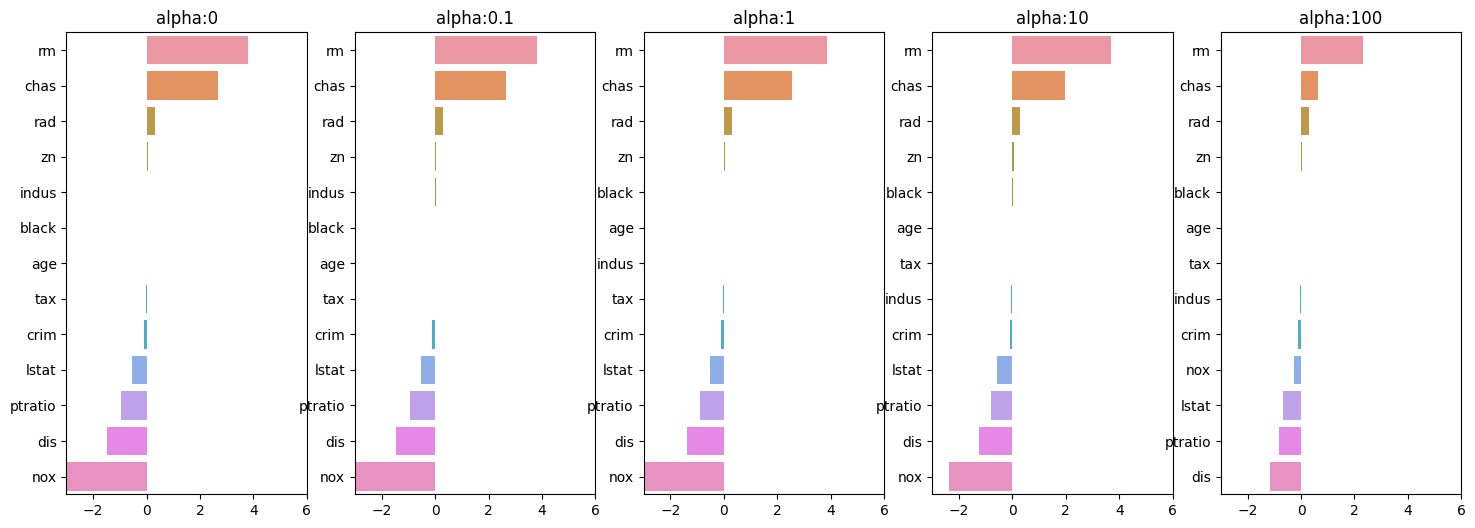

In [7]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [8]:
# alpha 값에 따른 회귀 계수 출력 
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.809865,3.818233,3.854000,3.702272,2.334536
chas,2.686734,2.670019,2.552393,1.952021,0.638335
rad,0.306049,0.303515,0.290142,0.279596,0.315358
zn,0.046420,0.046572,0.047443,0.049579,0.054496
indus,0.020559,0.015999,-0.008805,-0.042962,-0.052826
black,0.009312,0.009368,0.009673,0.010037,0.009393
age,0.000692,-0.000269,-0.005415,-0.010707,0.001212
tax,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
crim,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
lstat,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [9]:
# 릿지 회귀에서 알파값이 증가할수록 NOX값이 감소하여서 다른 회귀 계수 값들과 스케일이 비슷해짐
# 이로 인해 기존 회귀 모델의 성능이 개선됨

### 라쏘 회귀 (Lasso Regression)
    - 라쏘 회귀는 가중치의 절댓값에 대해 페널티를 부여하여 규제
    - 목적 함수에 정규화(regularization) 항을 추가하여 다음과 같이 표현
        - J(β) = RSS(β) + α∑(|β|)
    - 라쏘 회귀는 릿지 회귀와 달리 가중치를 0으로 만들 수 있으므로, 변수 선택(feature selection)의 효과를 가짐
    - 즉, 중요하지 않은 변수의 가중치를 0으로 만들어 해당 변수를 모델에서 제외시킴

- Lasso : L1 규제. W의 절댓값에 대해 페널티를 부여하는 방식
- L2 규제가 회귀 계수의 크기를 감소시키는데 반해,
- L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
- 따라서 feature selection의 특성을 가지고 있음

### L2 규제 vs L1 규제
- L2의 경우에는 가중치의 값을 이용
    - 어느 정도 튀는 값에 대해 대응할 수 있음
    - 따라서, 이상치나 노이즈가 있는 데이터에 대한 학습을 진행할 때 사용하면 좋음
    - 특히, 선형 모델의 일반화에 좋음
    - -> L2규제는 회귀 계수 값의 증감을 관리
- L1의 경우에는 가중치의 크기에 상관없이 상수값을 뺌
    - 대체적으로 불필요한 가중치의 수치를 0으로 만들도록 하는 방향으로 적용
    - 즉, 중요한 가중치만을 취하기 때문에 sparse feature에 대한 모델을 구성하는데 적합
    - -> L1규제는 회귀에 적절한 피처만 포함시키는 feature selection의 특성을 가짐

### 평균 RMSE, 회귀 계수 값들을 반환해주는 함수 이용

In [14]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [15]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [17]:
# 알파값이 0.07일 때 RMSE가 가장 좋음

### 라쏘는 알파 값이 증가되면서 특정 피처의 회귀 계수를 0으로 만들어서 해당 피처를 회귀식에서 제외시켜 버림

In [18]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.789725,3.703202,2.498212,0.949811,0.000000
chas,1.434343,0.955190,0.000000,0.000000,0.000000
rad,0.270936,0.274707,0.277451,0.264206,0.061864
zn,0.049059,0.049211,0.049544,0.049165,0.037231
black,0.010248,0.010249,0.009469,0.008247,0.006510
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
age,-0.011706,-0.010037,0.003604,0.020910,0.042495
tax,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
indus,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
crim,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [19]:
# 알파값이 0.5 이상일 때 CHAS 회귀 계수 값을 0으로 만들어 버림
# 알파값 0.07 부터 NOX 회귀 계수 값을 0으로 만들어 버림

### 엘라스틱넷 회귀 (Elastic Net Regression)
    - L2 규제(릿지)와 L1 규제(라쏘)를 결합한 회귀
    - 엘라스틱넷 회귀는 목적 함수에 L1 규제와 L2 규제 항을 추가하여 다음과 같이 표현
        - J(β) = RSS(β) + α₁∑(|β|) + α₂∑(β²)
        - J(β)는 목적함수, RSS(β)는 잔차 제곱합(residual sum of squares)을 의미하며
        - α₁과 α₂는 각각 L1 규제와 L2 규제의 강도를 조절하는 매개변수를 의미

In [20]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [21]:
# 알파값이 0.5일 때 RMSE가 가장 좋다

In [22]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.574162,3.414154,1.918419,0.938789,0.000000
chas,1.330724,0.979706,0.000000,0.000000,0.000000
rad,0.278880,0.283443,0.300761,0.289299,0.146846
zn,0.050107,0.050617,0.052878,0.052136,0.038268
black,0.010122,0.010067,0.009114,0.008320,0.007020
age,-0.010116,-0.008276,0.007760,0.020348,0.043446
tax,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
indus,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
crim,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
nox,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [28]:
# 엘라스틱넷 회귀는 릿지와 라쏘가 적절히 조합된 회귀를 만들어줌

## 데이터 전처리
- 정규화, 로그 변환, 스케일러, 원-핫 인코딩

### 피처 데이터 변환에 따른 예측 성능 비교

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

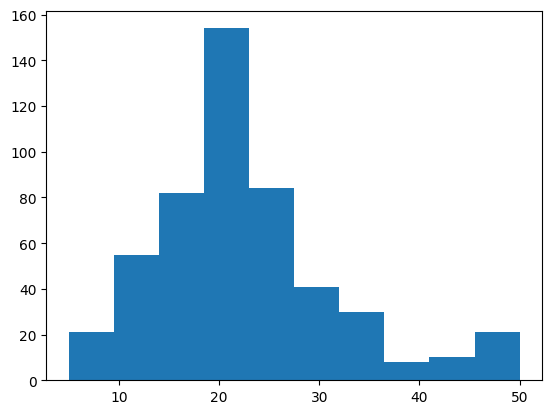

In [29]:
print(y_target.shape)
plt.hist(y_target, bins=10)

### 데이터 전처리(정규화, 로그변환)을 해주는 함수 정의

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [31]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

In [33]:
# 보통 로그 변환만으로도 충분히 RMSE가 좋아지게 만들 수 있음
# Polynomial은 값이 잘 나왔으나 과적합일 수 있음
# 보통 로그 변환만 하는 추세